### SIT744 - Deep Learning Assignment 1
<b>Trimester 1, 2022<br>
Brendan Richards (220616385)</b>

In [1]:
# Do a bunch of imports that I'll need for this assignment.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist

import warnings 
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'tensorflow'

In [2]:
#Load and partition the dataset.
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

**Task 1.1 Understanding the data**

1.   Describe the target classes for the classification task. Display 10 images from each target class.
2.   How many training images and how many test images are in the dataset?
Describe the data type and shape of the images.
3.   What preprocessing steps are required? Why?

**Task 1.1.1**

*Describe the target classes for the classification task. Display 10 images from each target class.*

<hr>
<b>Answers</b><br>
As per the site https://www.tensorflow.org/tutorials/keras/classification
The target classes are:

Label:  Class:

0      T-shirt/top <br>
1 	   Trouser <br>
2 	   Pullover <br>
3 	   Dress <br>
4 	   Coat <br>
5 	   Sandal <br>
6 	   Shirt <br>
7 	   Sneaker <br>
8 	   Bag <br>
9 	   Ankle boot <br>

Class label: T-shirt/top


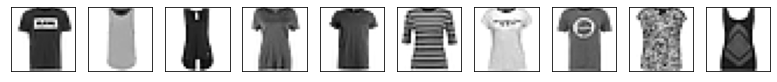

Class label: Trouser


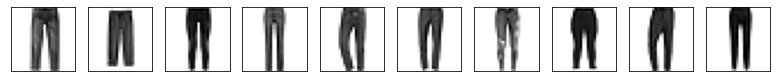

Class label: Pullover


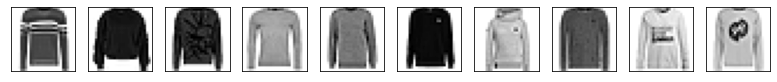

Class label: Dress


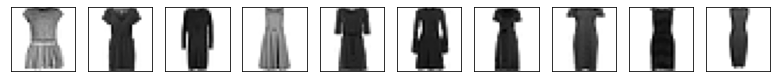

Class label: Coat


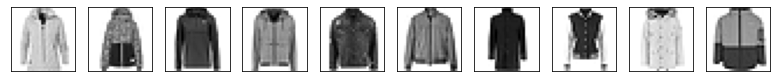

Class label: Sandal


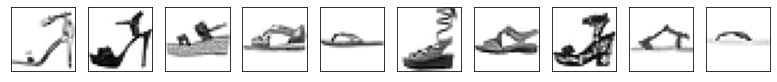

Class label: Shirt


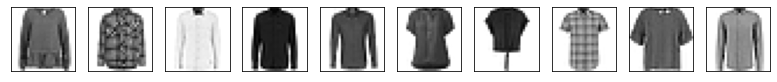

Class label: Sneaker


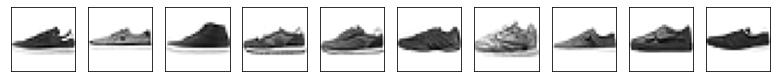

Class label: Bag


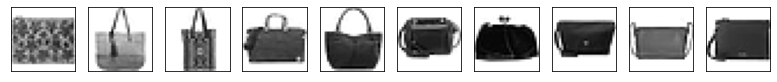

Class label: Ankle boot


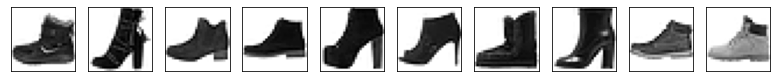

In [3]:
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def show_10(inc):
    i = 0
    j = 0
    plt.figure(figsize=(15,15))

    for j in range(60000):
        if train_labels[j] == inc:
            i +=1
            if i > 10:
                break
            plt.subplot(1,11,i+1)
            plt.xticks([])
            plt.yticks([])       
            plt.imshow(train_images[j], cmap=plt.cm.binary)
    plt.show()

for x in range(10):
    print("Class label:", labels[x])
    show_10(x)

**Task 1.1.2**

*How many training images and how many test images are in the dataset? Describe the data type and shape of the images.*

<hr>
<b>Answers</b><br>
From the results below we can see that there are 60,000 images in the training
dataset, and 10,000 in the test dataset.
The images are in a 28x28 grid, making a square image of 784 pixels. Each pixel has a value from 0-255 
representing the intensity of their grey hue.
Once the load_data() method is invoked, the data is loaded as Numpy arrays.

In [4]:
print("Training dataset size and shape:", train_images.shape)
print("Training dataset type:", type(train_images))
print("")
print("Training label set size and shape:", train_labels.shape)
print("Training label set type:", type(train_labels))
print("")
print("Testing dataset size and shape:", test_images.shape)
print("Testing dataset type:", type(test_images))
print("")
print("Testing label set size and shape:", test_labels.shape)
print("Testing label set type:", type(test_labels))

Training dataset size and shape: (60000, 28, 28)
Training dataset type: <class 'numpy.ndarray'>

Training label set size and shape: (60000,)
Training label set type: <class 'numpy.ndarray'>

Testing dataset size and shape: (10000, 28, 28)
Testing dataset type: <class 'numpy.ndarray'>

Testing label set size and shape: (10000,)
Testing label set type: <class 'numpy.ndarray'>


**Task 1.1.3**
*What preprocessing steps are required? Why?*

<hr>
<b>Answers</b><br>
There are three preprocessing steps required.<br> 
1) To divide the values in the image datasets by 255.0. This will both convert the data type from an integer to a float
and will also make the values between 0 and 1. This is necessary for the deep learning process to be able to use this data.<br>
2) Is optional, but useful. This is to split the training dataset further into having validation datasets.<br>
3) Is to make the image arrays one dimensional; 784x1 instead of 28x28. This is required so that the data for each 
image can be passed into the first layer of the model all at the same time. 

In [5]:
# Dividing by 255.0
train_images = train_images / 255.0
test_images = test_images / 255.0

# Making a validation set
val_images = train_images[:10000]
partial_images = train_images[10000:]
val_labels = train_labels[:10000]
partial_labels = train_labels[10000:]

# I'll use the inbuilt 'flatten()' layer function from keras to do the last transformation.

**Task 1.2 Setting up a model for training**

Construct a deep feedforward neural network. In other words, you can use **only fully connected (dense) layers**. You need to decide and report the following configurations:

- Output layer: 
    - How many output nodes?
    - Which activation function?
- Hidden layers:
    - How many hidden layers?
    - How many nodes in each layer?
    - Which activation function for each layer?
- Input layer
    - What is the input size?
    - Do you need to reshape the input? Why?

Justify your model design decisions.

Plot the model structure `using keras.utils.plot_model` or similar tool

<hr>
<b>Answers</b><br>

**Output Layer:**
The output layer has 10 nodes. This is because there are ten classes being categorised. Each category needs to have a node where it is the highest probability for there to be meaningful output here.
The activation function is 'softmax'. The reason I chose this is because it is suitable for a non-binary classification task.
As the official keras documatation says:<br>
"Softmax is often used as the activation for the last layer of a classification 
network because the result could be interpreted as a probability distribution."<br>
(https://keras.io/api/layers/activations/)<br>
The model decisions regarding the output layer were an outcome of the type of multiclass classification problem (and the number of categories) that I was trying to solve rather than any other reason.

**Hidden Layers:**
I have chosen to use 3 hidden layers, using Leaky Relu for the activation function.<br>
I chose 3 hidden layers because I experimented with using more layers, but did not see any benefit from doing so. This number also allowed me to test a 'tapering' approach to nodes in the hidden layers which I had read about and wanted to experiment with.<br>
I chose to use 300 nodes in the first layer, as this seemed to be a common number that was used by tutorials I saw, and in a discussion on the topic within the book 'Hands on Machine Learning with Scikit-Learn, Keras & TensorFlow 2nd edition' by Aurelien Geron. I chose to use 200 nodes in the second hidden layer, and 100 nodes in the third hidden layer, partly because I was experimenting to see if there was any difference in a tapering number of nodes (as per another discussion in the just mentioned text) but also because one of the later questions in this assignment asks for a heatmap visualisation of weights, and this made the heatmap clearer for me to interpret. Seeing as there was no difference in the performance in my experimentations, I chose to keep the 300/200/100 modeling.<br>
Again, I experimented with this number and found no other configurations performing significantly better.<br>

I chose to use Leaky Relu because it is meant to be a safer upgrade to normal Relu, as it solves a potential problem of 'dying ReLUs'. I also experimented with other activations such as elu and selu, and found that Leaky ReLU worked as well as the others.<br>
The model decisions regarding the hidden layers were made based on my desire to learn via experimentation and to find a decent outcome which didn't take too long to run.

**Input Layer:**
The input size is 784x1, which is equal to 28x28. This means that a single whole image is being passed in as input.<br>
The input gets reshaped by using keras's Flatten() function.<br>
The model decisions regarding the input layer were an outcome of the input type/format/shape rather than any other reason.

In [6]:
DFFNN = keras.models.Sequential()
DFFNN.add(keras.layers.Flatten(input_shape = [28, 28]))
DFFNN.add(keras.layers.Dense(300, activation = 'LeakyReLU'))
DFFNN.add(keras.layers.Dense(200, activation = 'LeakyReLU'))
DFFNN.add(keras.layers.Dense(100, activation = 'LeakyReLU'))
DFFNN.add(keras.layers.Dense(10, activation = 'softmax'))

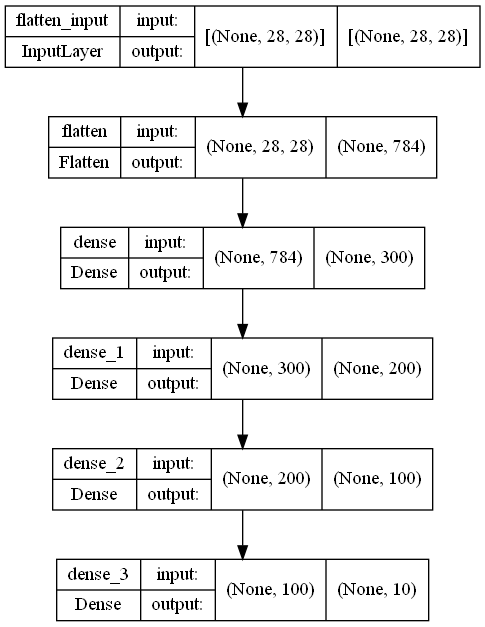

In [7]:
from tensorflow.keras.utils import plot_model
image_file = 'image.png'
plot_model(DFFNN, to_file=image_file, show_shapes=True)

**Task 1.3 Fitting the model**

Decide and report the following settings:

- The loss function
- The metrics for model evaluation (which may be different from the loss function)

Explain their roles in model fitting.

Decide the optimiser that you will use. Also report the following settings:

1. The training batch size
2. The number of training epochs 
3. The learning rate. If you used momentum or a learning rate schedule, please report the configuration as well.

Justify your decisions.

Now fit the model. Show how the training loss changes. How did you decide when to stop training?

<hr>
<b>Answers</b><br>
The loss function I have used for my model is 'sparse_categorical_crossentropy' which is suitable for this kind of multi-class classification task, where the labels are represented as integers and have not been one-hot encoded.
The metric I have chosen is Accuracy. This seems to be a common metric used for this kind of problem.

Their roles in model fitting seem to be well stated on this site:<br>
>"Loss: Used to evaluate and diagnose model optimization only.<br>
>Metric: Used to evaluate and choose models in the context of the project."<br>
https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/<br><br>

Within my particular model building, this means that I would be choosing based on minimimised loss for my validation data, and would be considering Accuracy more against the test data.<br>

The batch size was chosen after some experimentation, but also after reading in 'Hands on Machine Learning with Scikit-Learn, Keras & TensorFlow 2nd edition' by Aurelien Geron on page 326 about how "friends don't let friends use mini-batches larger than 32".<br>
Ultimately I settled on using a size of 128 as it gave a good balance of processing speed and results.<br>

When it came to choosing the optimizer, I experimented and found that Adam produced the best results in regards to minimising the loss function. I also experimented with SGD and Nadam.<br>
I used early stopping to help me determine the number of epochs to use. Depending on the optimiser, batch size, and learning rate, I found that the best epoch changed to be anywhere between the 7th and somewhere around the 300th. In each case there was a dip in the loss function, which reached a nadir and then started curving back up again. This nadir was anything from the 7th to the 300th epoch, after which overfitting became apparent.<br>
Ultimately I ended up with a model named 'DFFNN_FF' which had 300 epochs, as the models with the lower learning rates produced the best results, but also took longer before overfitting.<br><br>
I chose the learning rate based on experimentation, from 0.00001, 0.0001, 0.001, 0.01 and 0.1, finding the best loss scores for 0.00001. This also produced the most reliable scores, as faster learning rates tended to have charts with higher variability.<br>

In [8]:
opt = keras.optimizers.Adam(learning_rate=0.00001)
DFFNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

In [9]:
from keras import callbacks
stop = callbacks.EarlyStopping(monitor = "val_loss", 
                                        mode ="min", patience = 150, 
                                        restore_best_weights = True)

fit = DFFNN.fit(partial_images, partial_labels, batch_size = 128, 
                    epochs = 650, validation_data =(val_images, val_labels), 
                    callbacks =[stop], verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

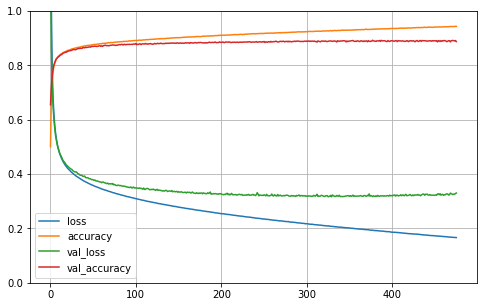

In [10]:
pd.DataFrame(fit.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [11]:
#After seeing the results of the fitting, and the chart it produced, I chose to use 300 epochs for my final fit.
DFFNN_FF = keras.models.Sequential()
DFFNN_FF.add(keras.layers.Flatten(input_shape = [28, 28]))
DFFNN_FF.add(keras.layers.Dense(300, activation = 'LeakyReLU'))
DFFNN_FF.add(keras.layers.Dense(200, activation = 'LeakyReLU'))
DFFNN_FF.add(keras.layers.Dense(100, activation = 'LeakyReLU'))
DFFNN_FF.add(keras.layers.Dense(10, activation = 'softmax'))

DFFNN_FF.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
final_fit = DFFNN_FF.fit(partial_images, partial_labels, batch_size = 128, 
                    epochs = 300, validation_data =(val_images, val_labels), verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

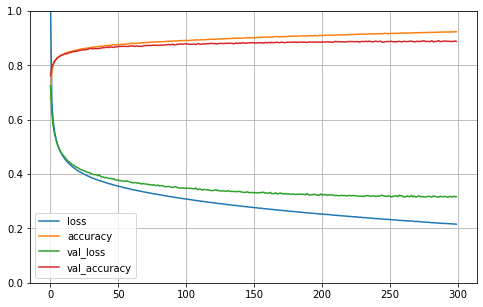

In [12]:
pd.DataFrame(final_fit.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

## **Group 2 (C Tasks) Analyse the model**

(weight ~ 10%)

### Task 2.1 Model size

(weight ~ 5%)

- What is the number of trainable parameters in the model? Explain how the total number can be estimated from the model configurations.
- How much memory is used for training and for inference, respectively?




<hr>
<b>Answers</b><br>
The number of trainable parameters in a feed forward network can be estimated as follows:
Sum the number of connections between neurons in each layer, and the biases of each layer.<br>
For example, in the model I have used, there is an input layer with 784 neurons, the first hidden layer has 300 neurons, the second hidden layer has 200 neurons, the third hidden layets has 100, and the output layer has 10 neurons.<br>
Between the input layer and the first hidden layer there are 784x300 connections, which is 235200.<br>
Between the first hidden layer and the second hidden layer there are 300x200 connections, which is 60000.<br>
Between the second hidden layer and the third hidden layer there are 200x100 connections, which is 20000.<br>
Between the third hidden layer and the output layer there are 100x10 connections, which is 1000.<br>
Sum all of these connections to get 316200 parameters.

The bias for each layer can be found by counting the nuerons of the next layer.<br>
For the input layer, the next layer has 300 neurons.<br>
For the first hidden layer, the next layer has 200 neurons.<br>
For the second hidden layer, the next layer has 100 neurons.<br>
For the third hidden layer, the next layer has 10 neurons.<br>
Sum of all of these biases is 610 parameters.

Sum of all parameters in this model is 316810.

The memory usage for a feed forward, fully connected network is easily counted if you know how many weights there are. Convention says that the biases, or any overhead from activation functions, doesn't get counted.
So for my model there would be a memory usage during inference would be 316810 FLOPs (assuming floating point operations). Because the training stage has both forward and back propogation, this can be essentially doubled, resulting in 633620 FLOPS. 

Another way to look at memory usage is shown below - while training one of my models, it looks like almost the entire 11GB of dedicated GPU memory that I have on my video card was being used.<br>
<img src="Memory_usage.jpg">

### Task 2.2 Visualise the parameter values

(weight ~ 5%)

Think about what initialisation method have you chosen for training the model? If you did not specify the initialisation method, find out what is the default one. 

Reinitialise the model parameters. Choose a layer and visualise its initial weights. (Hint: You may use a heatmap to visualise a matrix.)


After fitting the model, visualise the model weights again. How did the weights change? Why?

<hr>
<b>Answers</b><br>
The default initialisation method for dense layers in keras.models.Sequential is glorot_uniform.

If you compare the heatmap before and after fitting, you would see that the pattern is essentially the same, and the colours remain similar, but there is some desaturation in the post-fitting heatmap. This indicates that the values of the weights are shifting to be less extreme.

In [14]:
#Reinitialising model parameters:
#This code copied almost verbatim from here: https://stackoverflow.com/questions/40496069/reset-weights-in-keras-layer
#by poster Nicolas Gervais
#My changes are just in variable/object names, not in basic logic.

for ix, layer in enumerate(DFFNN.layers):
    if hasattr(DFFNN.layers[ix], 'kernel_initializer') and \
            hasattr(DFFNN.layers[ix], 'bias_initializer'):
        weight_initializer = DFFNN.layers[ix].kernel_initializer
        bias_initializer = DFFNN.layers[ix].bias_initializer

        old_weights, old_biases = DFFNN.layers[ix].get_weights()

        DFFNN.layers[ix].set_weights([
            weight_initializer(shape=old_weights.shape),
            bias_initializer(shape=old_biases.shape)])

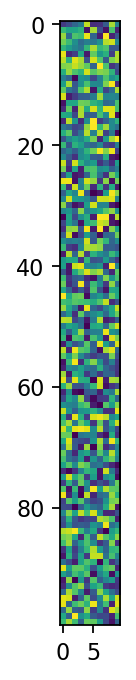

In [15]:
layer_weights = DFFNN.layers[4].get_weights()

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(1, 5), dpi=160)
plt.imshow(layer_weights[0])
plt.show()

In [16]:
weights_fitting = DFFNN.fit(partial_images, partial_labels, batch_size = 128, 
                    epochs = 650, validation_data =(val_images, val_labels), verbose=0)

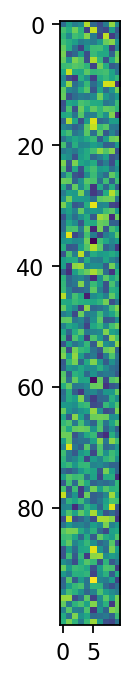

In [17]:
layer_weights = DFFNN.layers[4].get_weights()

figure(figsize=(1, 5), dpi=160)
plt.imshow(layer_weights[0])
plt.show()

## **Group 3 (D Tasks) Use TensorFlow tools**

(weight ~ 10%)

### Task 3.1 Check the training using TensorBoard

Use TensorBoard to visualise the training process. Show screenshots of your TensorBoard output.

Do you see overfitting or underfitting? Why?
If you see overfitting, at which epoch did it happen?




<hr>
<b>Answers</b><br>
In the screenshot shown below, where displays the chart for validation loss against the training loss, overfitting is present. The lines for the training loss and the validation loss deviate from each other quite early, and this difference grows larger as the epochs progress. The training loss keeps dropping for the entire 650 epochs.<br>

It isn't precisely clear where the overfitting occurs, because there is quite a lot of variability in the validation loss line of the chart. However, it appears that the loss reaches a minimum shortly after the 300th epoch, potentially around the 320th epoch. After this, the loss begins to increases again. This is the sign that overfitting has happened.<br>

As such, I would say that the overfitting happened somewhere around the 300th epoch.<br>

<img src='TB_base.jpg' width = "450" align="left"><br>

In [18]:
#in command line: tensorboard --logdir logs/fit

import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

opt = keras.optimizers.Adam(learning_rate=0.00001)
DFFNN.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

TB_fit = DFFNN.fit(partial_images, partial_labels, batch_size = 128, 
                    epochs = 650, validation_data =(val_images, val_labels), callbacks=[tensorboard_callback], verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

### Task 3.2 Apply regularisation

Improve the training process by applying regularisation. Below are some options:

1.   Dropout
2.   Batch normalisation

Compare the effect of different regularisation techniques to the model training. You may also try other techniques for improving training such as learning rate scheduling (see https://www.tensorflow.org/guide/keras/train_and_evaluate#using_learning_rate_schedules).

<hr>
<b>Answers</b><br>
I experimented with Dropout, Alpha Dropout, Batch Normalisation, and Learning Rate Scheduling.<br><br>
With each of these methods I found that the time taken to complete the fit was less than when I didn't apply any regularisation.<br>

From the below diagrams we can see that the different regularisation methods had quite distinct effects - which may be intrinsic to these methods, or may be a result of my specific hyperparameter choices. Please note that I was only interesting in the validation loss lines at this point.<br>

Using dropout lead to the smoothest line, with the least amount of variance. It initially dropped quickly, then the rate of decrease flattened out. However, it was still decreasing slightly as it reached the 650th epoch, not quite seeming to get below .35 loss.<br>
Using alpha dropout led to the most unusual shape. After a steep initial plummet, it sharply rose agin before starting to taper off more gently. While it appeared to be still travelling slightly downward at the 650th epoch, I note that it was flattening out around 1.4 loss, and even with the initial plunge, never went below 1.3.<br>
Using batch normalisation led to a curve which initially dropped quickly, but at around the 100th epoch, began to rise again - implying overfitting has occured. The curve appeared to be fairly smnooth initially, with more variance showing as the epochs progress. It reached a minimum loss around .32 which is comparable to the best performance of all the models.<br>
Using learning rate scheduling produced a curve which had a similar shape to the batch normalisation, although with lower loss scores. This curve reached a minimum at around the 60th to 70th epoch, however the line had so much variance it is difficult to say which epoch was the nadir and what a reliable loss score would be. Most of epochs 30 to 130 are lower than the .32 scored by batch normalisation, which, despite the variability, might make this the best model.<br>

All of the regularisation methods improved the loss when compared to the initial model created during task 1 - with the exception of the alpha dropout regularisation method, which was the worst of the lot.<br>

Dropout:<br>
<img src='TB_dropout.jpg' width = "450" align="left"><br>

Alpha Dropout:<br>
<img src='TB_alphadropout.jpg' width = "450" align="left"><br>

Batch Normalisation:<br>
<img src='TB_Batchnorm.jpg' width = "450" align="left"><br>

Learning rate schedule:<br>
<img src='TB_learningrate.jpg' width = "450" align="left"><br>

In [19]:
#Dropout
from tensorflow.keras.layers import Dropout
DFFNN_dropout = keras.models.Sequential()
DFFNN_dropout.add(keras.layers.Flatten(input_shape = [28, 28]))
DFFNN_dropout.add(keras.layers.Dense(300, activation = 'LeakyReLU'))
DFFNN_dropout.add(Dropout(0.5))
DFFNN_dropout.add(keras.layers.Dense(200, activation = 'LeakyReLU'))
DFFNN_dropout.add(Dropout(0.5))
DFFNN_dropout.add(keras.layers.Dense(100, activation = 'LeakyReLU'))
DFFNN_dropout.add(keras.layers.Dense(10, activation = 'softmax'))

import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

opt = keras.optimizers.Adam(learning_rate=0.00001)
DFFNN_dropout.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

TB_fit = DFFNN_dropout.fit(partial_images, partial_labels, batch_size = 128, 
                    epochs = 650, validation_data =(val_images, val_labels), callbacks=[tensorboard_callback], verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [20]:
#AlphaDropout
from tensorflow.keras.layers import AlphaDropout
DFFNN_alphadropout = keras.models.Sequential()
DFFNN_alphadropout.add(keras.layers.Flatten(input_shape = [28, 28]))
DFFNN_alphadropout.add(keras.layers.Dense(300, activation = 'LeakyReLU'))
DFFNN_alphadropout.add(AlphaDropout(0.5))
DFFNN_alphadropout.add(keras.layers.Dense(200, activation = 'LeakyReLU'))
DFFNN_alphadropout.add(AlphaDropout(0.5))
DFFNN_alphadropout.add(keras.layers.Dense(100, activation = 'LeakyReLU'))
DFFNN_alphadropout.add(keras.layers.Dense(10, activation = 'softmax'))

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

opt = keras.optimizers.Adam(learning_rate=0.00001)
DFFNN_alphadropout.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

TB_fit = DFFNN_alphadropout.fit(partial_images, partial_labels, batch_size = 128, 
                    epochs = 650, validation_data =(val_images, val_labels), callbacks=[tensorboard_callback], verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [21]:
#BatchNormalization
from keras.layers import BatchNormalization
DFFNN_BN = keras.models.Sequential()
DFFNN_BN.add(keras.layers.Flatten(input_shape = [28, 28]))
DFFNN_BN.add(keras.layers.Dense(300, activation = 'LeakyReLU'))
DFFNN_BN.add(BatchNormalization())
DFFNN_BN.add(keras.layers.Dense(200, activation = 'LeakyReLU'))
DFFNN_BN.add(BatchNormalization())
DFFNN_BN.add(keras.layers.Dense(100, activation = 'LeakyReLU'))
DFFNN_BN.add(keras.layers.Dense(10, activation = 'softmax'))

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

opt = keras.optimizers.Adam(learning_rate=0.00001)
DFFNN_BN.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

TB_fit = DFFNN_BN.fit(partial_images, partial_labels, batch_size = 128, 
                    epochs = 650, validation_data =(val_images, val_labels), callbacks=[tensorboard_callback], verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

In [22]:
#Learning rate scheduling
epochs = 50
learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8

DFFNN_LR = keras.models.Sequential()
DFFNN_LR.add(keras.layers.Flatten(input_shape = [28, 28]))
DFFNN_LR.add(keras.layers.Dense(300, activation = 'LeakyReLU'))
DFFNN_LR.add(keras.layers.Dense(200, activation = 'LeakyReLU'))
DFFNN_LR.add(keras.layers.Dense(100, activation = 'LeakyReLU'))
DFFNN_LR.add(keras.layers.Dense(10, activation = 'softmax'))

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

opt = keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
DFFNN_LR.compile(loss = 'sparse_categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

TB_fit = DFFNN_LR.fit(partial_images, partial_labels, batch_size = 128, 
                    epochs = 650, validation_data =(val_images, val_labels), callbacks=[tensorboard_callback], verbose=0)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

## **Group 4 (HD Tasks) Research on deep learning methods**

*(weight ~20%)*

### Task 4.1 Analyse a new deep learning method

As a deep learning practitioner, you need to keep yourself updated on the latest models. Therefore it is important that you are able to understand research papers in key deep learning conferences. In this task, you will analyse a research paper from the *Tenth International Conference on Learning Representations (ICLR 2022)*, following the steps below:

1. Browse the list of papers published in ICLR 2022 (https://openreview.net/group?id=ICLR.cc/2022/Conference). Select one that interests you most. Why do you choose that paper?
2. What problem does the paper address? How is it related to what you learn in SIT744 so far?
3. Are there any existing methods for the problem? Why aren't they good enough? 
4. What contributions are made by the authors? For example, have they proposed a new method or have they raised more questions?
5. How do the authors validate their proposed method or hypothesis?
6. Overall, what connections do you discover between the paper and what you have learnt in SIT744.

**In addition to short answers to the above questions, submit a short (less than 5 minutes) video presentation for your analysis and main conclusions. You need to show your face in the video.**

<hr>
<b>Answers</b><br>
1) I chose the paper titled 'Language Modeling Via Stochastic Processes' by Rose E. Wang, Esin Durmus, Noah Goodman and Tatsunori B. Hashimoto from Stanford University.<br>
I chose this paper because I am interested in learning more about Natural Language Processing - I believe this is an important technology with very wide applications.<br><br>
2) The problem that this paper addresses is the one of generating longer texts that are of high quality. In the paper's abstract they attribute this problem to the 'next-token-only modeling language'. They state that automatically generated short texts are already quite good, but the longer texts are still requiring more refinement. Existing methods result in texts that meander, ramble, or stop making sense.<br>
However, the paper does not specify what parameters qualify a text as being 'long' versus being 'short'. This appears to be assumed prior knowledge on behalf of the reader, although the description of the datasets they use in their testing does allow us to infer what they mean by 'long' texts.<br><br>
3) The paper discusses existing work done towards solving this problem, and the shortfalls of these methods. They discuss 'planning-based methods' which need manually defined text dynamics - a process that needs to happen for each specific domain that the method is applied to.<br>
The paper also discusses 'sentence representations' (i.e. variational autoencoders or contrastive learning) where the main shortfall is that they capture similarity between neighbouring sentences but aren't capable of tracking changing dynamics across an entire document.<br>
The paper finally discusses an existing method which tries to learn a model of 'local latent dynamics'. The shortfall is that this method is inadequate for 'goal-conditioned' trajectories.<br><br>
4) The authors have suggested a new solution which they have named 'Time Control'. The core concept behind this is to model 'Brownian bridge dynamics' which is rooted in modeling Brownian motion, but with a path defined by a fixed start point and a fixed end point or goal. This allows for modeling that extends past simply local dynamics, but where the dynamics of sections of text that are further apart have less influence on each other than those that are close together.<br>
The actual implementation of this method, for the purposes of the experiment they run, used GPT2.<br>
The authors do raise some minor questions long the way; for example they hypothesise about why they attainted certain results without there being any way to draw firm conclusions - these could potentially be areas for further exploration.<br><br>
5) The authors validate their proposed method by actually conducting the experiment; enacting their proposed solution, generating output, and then measuring their results against different metrics, and comparing these to different existing methods.<br>
They sought to test four different questions about the performance of their method: whether it can model local text dynamics, can it generate locally coherent text, can it model global text dynamics and can it generate long coherent documents.<br>
They show their results in seven different tables, showing the performance of their method against other existing methods across a variety of different tests.<br><br>
6) Connecting this paper to my own learnings so far in SIT744 is tricky. I feel like I am only just starting to go through the very basics of deep learning, whereas the paper I read was at the cutting edge of deep learning - it feels like comparing a toddler's learning of their A B Cs to the novel 'War and Peace' by Tolstoy.<br>
The paper's discussion of tracking dynamics across long texts reminded me somewhat of how weights and biases work across layers of a neural network model. Likewise when they discussed the processing within the hidden layers of thier model it was likewise something I was familiar with from SIT744.<br>
During a recent tutorial the tutor discussed some methods used in text processing - how to break down a variety of strings of texts into vectors to perform deep learning on. I connected this to the method discussed in the paper regarding how they mapped text to their Brownian bridge.<br>
